In [31]:
import yahoo_fin.stock_info as si
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import get_data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
from pandas import to_datetime
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [32]:
#daily stock info for amazon 
amazon_daily = get_data("amzn", start_date="1/1/2018", end_date="1/21/2021",
                        index_as_date=False, interval="1d")
amazon_daily

,date,open,high,low,close,adjclose,volume,ticker
0,2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500,AMZN
1,2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800,AMZN
2,2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100,AMZN
3,2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700,AMZN
4,2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500,AMZN
...,...,...,...,...,...,...,...,...
763,2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3321200,AMZN
764,2021-01-14,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN
765,2021-01-15,3123.020020,3142.550049,3095.169922,3104.250000,3104.250000,4214200,AMZN
766,2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3120.760010,3305100,AMZN


In [33]:
amazon_daily.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')

In [34]:
#selecting only needed features
amazon_daily = amazon_daily[['date', 'close']]
amazon_daily


,date,close
0,2018-01-02,1189.010010
1,2018-01-03,1204.199951
2,2018-01-04,1209.589966
3,2018-01-05,1229.140015
4,2018-01-08,1246.869995
...,...,...
763,2021-01-13,3165.889893
764,2021-01-14,3127.469971
765,2021-01-15,3104.250000
766,2021-01-19,3120.760010


In [35]:
#Rename features
amazon_daily = amazon_daily.rename(columns = {'date':'ds', 'close':'y'})
amazon_daily

,ds,y
0,2018-01-02,1189.010010
1,2018-01-03,1204.199951
2,2018-01-04,1209.589966
3,2018-01-05,1229.140015
4,2018-01-08,1246.869995
...,...,...
763,2021-01-13,3165.889893
764,2021-01-14,3127.469971
765,2021-01-15,3104.250000
766,2021-01-19,3120.760010


In [45]:
#Modeling (95% confiddence interval)
model = Prophet(interval_width=0.95) 
# fit the model using all data
model.fit(amazon_daily) # fit the model using all data

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


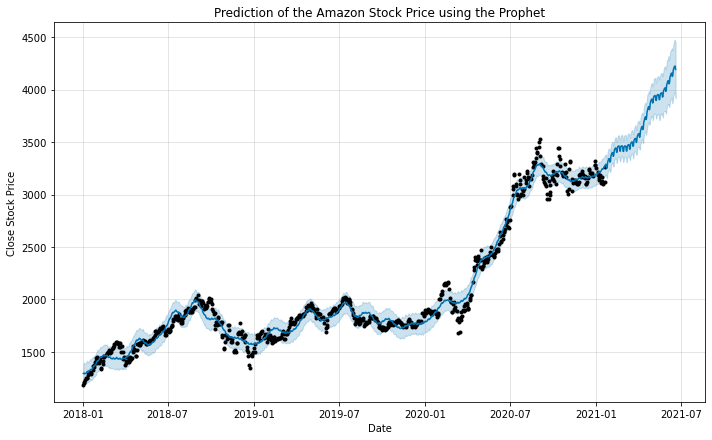

In [46]:
#we need to specify the number of days in future -- 150

future = model.make_future_dataframe(periods=150) rediction = m.predict(future)
model.plot(prediction)
plt.title("Prediction of the Amazon Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

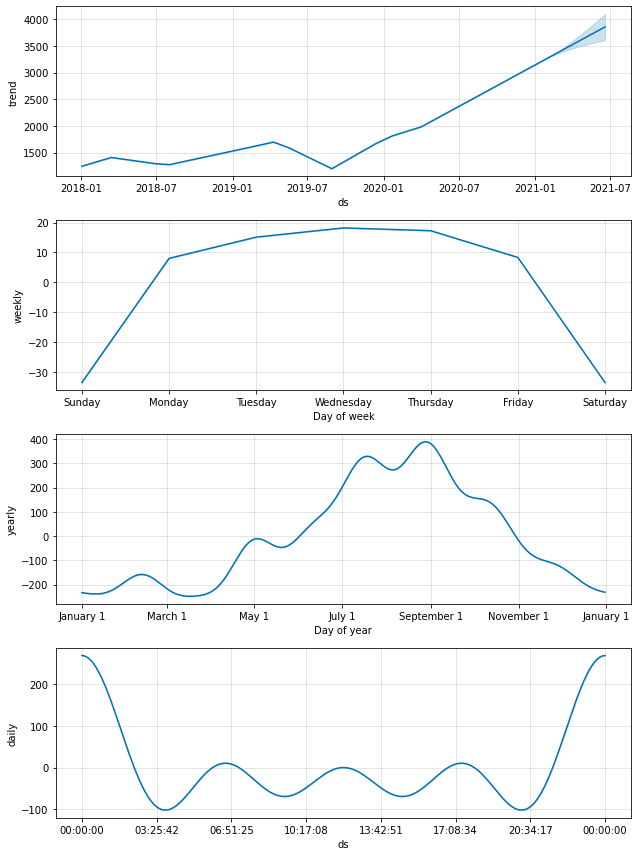

In [47]:
#analyzing components of prediction model
m.plot_components(prediction)
plt.show()

In [55]:
# Use make_future_dataframe() with daily frequency for one year
future_dates = model.make_future_dataframe(periods=365, freq='D')
future_dates

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1128,2022-01-16
1129,2022-01-17
1130,2022-01-18
1131,2022-01-19


In [56]:
forecast = model.predict(future_dates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,1482.284170,1150.319125,1450.875304,1482.284170,1482.284170,-177.268002,-177.268002,-177.268002,61.595691,61.595691,61.595691,-238.863692,-238.863692,-238.863692,0.0,0.0,0.0,1305.016168
1,2018-01-03,1483.815942,1163.520514,1456.378691,1483.815942,1483.815942,-175.112365,-175.112365,-175.112365,64.753708,64.753708,64.753708,-239.866073,-239.866073,-239.866073,0.0,0.0,0.0,1308.703577
2,2018-01-04,1485.347714,1164.421949,1469.470146,1485.347714,1485.347714,-176.705995,-176.705995,-176.705995,64.031148,64.031148,64.031148,-240.737144,-240.737144,-240.737144,0.0,0.0,0.0,1308.641719
3,2018-01-05,1486.879487,1151.959611,1451.185472,1486.879487,1486.879487,-186.410284,-186.410284,-186.410284,55.063172,55.063172,55.063172,-241.473456,-241.473456,-241.473456,0.0,0.0,0.0,1300.469203
4,2018-01-08,1491.474803,1145.537395,1458.770627,1491.474803,1491.474803,-188.025410,-188.025410,-188.025410,54.774316,54.774316,54.774316,-242.799726,-242.799726,-242.799726,0.0,0.0,0.0,1303.449393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2022-01-16,5020.719816,3138.376065,6086.133231,3544.240066,6421.336620,-387.525919,-387.525919,-387.525919,-150.109016,-150.109016,-150.109016,-237.416903,-237.416903,-237.416903,0.0,0.0,0.0,4633.193898
1129,2022-01-17,5025.036187,3338.591768,6282.911814,3542.197336,6431.026634,-180.765054,-180.765054,-180.765054,54.774316,54.774316,54.774316,-235.539370,-235.539370,-235.539370,0.0,0.0,0.0,4844.271133
1130,2022-01-18,5029.352558,3330.188451,6310.912335,3540.154607,6441.715292,-171.755106,-171.755106,-171.755106,61.595691,61.595691,61.595691,-233.350796,-233.350796,-233.350796,0.0,0.0,0.0,4857.597453
1131,2022-01-19,5033.668929,3341.343914,6291.344037,3538.111877,6452.403951,-166.092471,-166.092471,-166.092471,64.753708,64.753708,64.753708,-230.846179,-230.846179,-230.846179,0.0,0.0,0.0,4867.576459


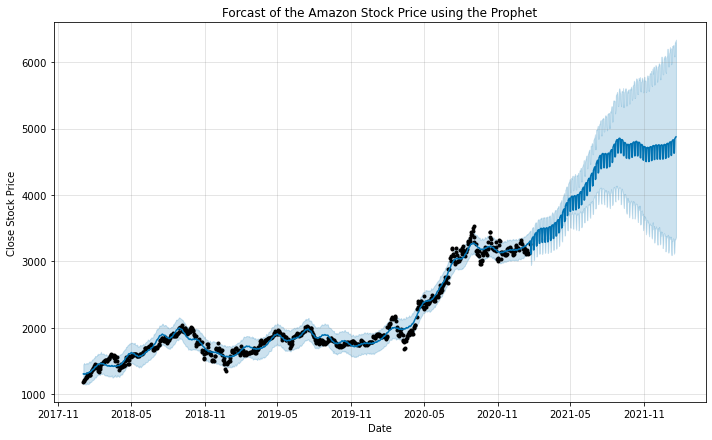

In [60]:
model.plot(forecast, uncertainty=True)
plt.title("Forcast of the Amazon Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()


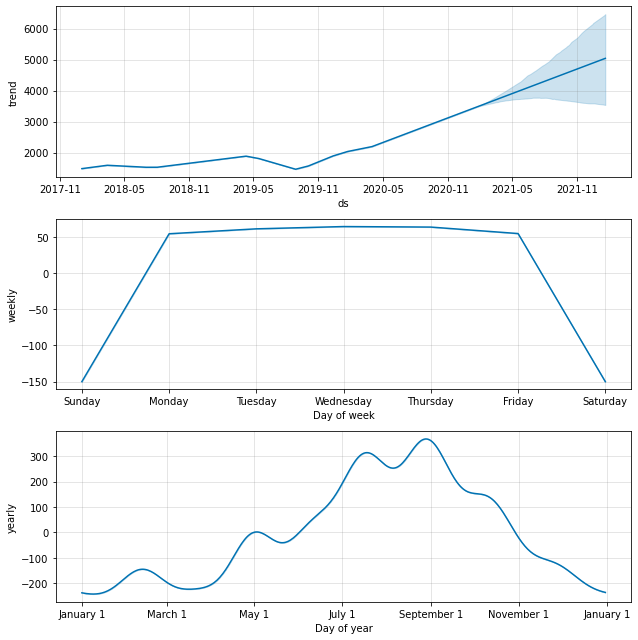

In [59]:
model.plot_components(forecast)
plt.show()